# 1st COMputing CHAllenges School <a class="tocSkip">

## Hands-on Boosted Decision Trees <a class="tocSkip">
  
*Barcelona, October 4th, 2019*

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Tutorial" data-toc-modified-id="Tutorial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tutorial</a></span><ul class="toc-item"><li><span><a href="#The-data" data-toc-modified-id="The-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The data</a></span><ul class="toc-item"><li><span><a href="#Format-data" data-toc-modified-id="Format-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Format data</a></span></li></ul></li></ul></li><li><span><a href="#Make-the-model" data-toc-modified-id="Make-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make the model</a></span></li><li><span><a href="#Now-train!" data-toc-modified-id="Now-train!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Now train!</a></span></li><li><span><a href="#It's-your-turn!" data-toc-modified-id="It's-your-turn!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>It's your turn!</a></span></li></ul></div>

***
# Introduction
** Boosted decision tree code**:

We'll use the python API for the [XGBoost (eXtreme Gradient Boosting) library](https://github.com/dmlc/xgboost).

**Data**:

[Atlas](https://home.cern/about/experiments/atlas) hosted a [Kaggle](https://www.kaggle.com/) competition for identifying Higgs to tau tau events, [the Higgs Boson Machine Learning Challenge](https://www.kaggle.com/c/higgs-boson/data). The training data for this event contains 250,000 labeled, simulated Atlas events in csv format described [here](https://www.kaggle.com/c/higgs-boson/data) and [here](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

**Data handling**:

We will use [pandas](http://pandas.pydata.org/), an amazing tool for exploring data in Python.
***
**Install XGBoost**:

Assuming you have python, numpy, matplotlib, and pandas installed, you just need to install XGBoost:

Execute following command in a terminal to install it:

``` python
conda install -c conda-forge xgboost
```

Detailed installation instructions are [here](https://xgboost.readthedocs.io/en/latest/build.html). 


***
**Links**:

A lot of this was borrowed from other sources. These sources and other good places for information about XGBoost and BDTs in general are here:

XGBoost demo: [Example of how to use XGBoost Python Module to run Kaggle Higgs competition](https://github.com/dmlc/xgboost/tree/master/demo/kaggle-higgs)

Blog post by phunther: [Winning solution of Kaggle Higgs competition: what a single model can do?](https://no2147483647.wordpress.com/2014/09/17/winning-solution-of-kaggle-higgs-competition-what-a-single-model-can-do/)

XGBoost Kaggle Higgs solution: https://github.com/hetong007/higgsml

***

# Tutorial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

## The data

First, load in the data and look at it. Then we'll put it in the right format for xgboost.

In [3]:
data = pd.read_csv('data/training.csv')

Let's see what the data looks like:

In [4]:
print ('Size of data: {}'.format(data.shape))
print ('Number of events: {}'.format(data.shape[0]))
print ('Number of columns: {}'.format(data.shape[1]))

print ('\nList of features in dataset:')

for col in data.columns:
    print (col)

Size of data: (250000, 33)
Number of events: 250000
Number of columns: 33

List of features in dataset:
EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


In [6]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


The data set has 250,000 events with 33 columns each. It looks like the first column is an identifier, and shouldn't be used as a feature. The last two columns "Weight" and "Label", are the weights and labels from the simulation, and also shouldn't be used as features (this information is all contained in the documentation).

Now we can look at how many events are signal and background:

In [12]:
# look at column labels --- notice last one is "Label" and first is "EventId" also "Weight"
print ('Number of signal events: {}'.format(len(data[data.Label == 's'])))
print ('Number of background events: {}'.format(len(data[data.Label == 'b'])))
print ('Fraction of signal: {}'.format(len(data[data.Label == 's'])/len(data)))

Number of signal events: 85667
Number of background events: 164333
Fraction of signal: 0.342668


### Format data
Now we should get the data into an XGBoost-friendly format. We can create DMatrix objects that will be used to train the BDT model. For now, we'll use all 30 of the features for training.

First, we'll sliceup the data into training and testing sets. Here, we take 20% for the test set, which is arbitrary.

In this file, all samples are independent and ordered randomly, so we can just grab a chunk. Check out [scikit-learn Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) for dividing up samples in a responsible way.

We can also change the data type of the "Label" column to the pandas type "category" for easier use later.

In [14]:
data['Label'] = data.Label.astype('category')

In [125]:
chunk = 200000

data_train = data[:chunk]
data_test  = data[chunk:]

Check to make sure we did it right:

In [124]:
print ('Number of training samples: {}'.format(len(data_train)))
print ('Number of test samples: {}'.format(len(data_test)))

print ('\nNumber of signal events in training set: {}'.format(len(data_train[data_train.Label == 's'])))
print ('Number of background events in training set: {}'.format(len(data_train[data_train.Label == 'b'])))
print ('Fraction of signal: {}'.format(len(data_train[data_train.Label == 's'])/len(data_train)))

Number of training samples: 200000
Number of test samples: 50000

Number of signal events in training set: 68504
Number of background events in training set: 131496
Fraction of signal: 0.34252


The DMatrix object takes as arguments:
- data --- the features
- label --- 1/0 or true/false for binary data (we have to convert our label to bool from string s/b)
- missing --- how missing values are represented (here as -999.0)
- feature_names --- the names of all of the features (optional)

In [29]:
feature_names = data.columns[1:-2]  # skip the first and last two columns (evtID, weight and label)

train = xgb.DMatrix(data          = data_train[feature_names],
                    label         = data_train.Label.cat.codes,
                    missing       = -999.0,
                    feature_names = feature_names)

test = xgb.DMatrix(data           = data_test[feature_names],
                   label          = data_test.Label.cat.codes,
                   missing        = -999.0,
                   feature_names  = feature_names)

Check if we did it right:

In [42]:
print ('Number of training samples: {}'.format(train.num_row()))
print ('Number of test samples: {}'.format(test.num_row()))

print ('\nNumber of signal events in training set: {}'.format(len(np.where(train.get_label())[0])))

Number of training samples: 200000
Number of test samples: 50000

Number of signal events in training set: 68504


# Make the model

**Set hyperparameters**


The XGBoost hyperparameters are defined [here](https://xgboost.readthedocs.io/en/latest/parameter.html). For a nice description of what they all mean, and tips on tuning them, see [this guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In general, the tunable parameters in XGBoost are the ones you would see in other gradient boosting libraries. Here, they fall into three categories:
1. General parameters - Ex. which booster to use, number of threads.
2. Booster parameters - Tune the actual boosting. Ex. learning rate. These are the ones to optimize.
3. Learning task parameters - Define the objective function and the evaluation metrics.

Here, we will use the defaults for most parameters and just set a few to see how it's done. The parameters are passed in as a dictionary or list of pairs.

Make the parameter dictionary:

In [1]:
param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param["eval_metric"] = 'auc'

param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

First, we set the booster parameters. Again, we just chose a few here to experiment with. These are the paraters to tune to optimize your model. Generally, there is a trade off between speed and accuracy.
1. ```eta``` is the learning rate. It determines how much to change the data weights after each boosting iteration. The default is 0.3.
2. ```max_depth``` is the maximum depth of any tree. The default is 6.
3. ```subsample``` is the fraction of events used to train each new tree. These events are randomly sampled each iteration from the whole sample set. The default is 1 (use every event for each tree).
4. ```colsample_bytree``` is the fraction of features available to train each new tree. These features are randomly sampled each iteration from the whole feature set. The default is 1.

Next, we set the learning objective to ```binary:logistic```. So, we have two classes that we want to score from 0 to 1. The ```eval_metric``` parameters set what we want to monitor when doing cross validation. (We aren't doing cross validation in this example, but we really should be!) If you want to watch more than one metric, ```param``` must be a list of pairs, instead of a dict. Otherwise, we would just keep resetting the same parameter.

Last, we set the number of trees to 100. Usually, you would set this number high, and choose a cut off point based on the cross validation. The number of trees is the same as the number of iterations.

# Now train!

In [55]:
watchlist = [ (train, 'train') ]

booster = xgb.train( param, train, num_boost_round=num_trees, evals=watchlist )

[0]	train-auc:0.883841	train-logloss:0.646723	train-rmse:0.476283
[1]	train-auc:0.898478	train-logloss:0.609462	train-rmse:0.456587
[2]	train-auc:0.908543	train-logloss:0.573793	train-rmse:0.437292
[3]	train-auc:0.913022	train-logloss:0.542831	train-rmse:0.420316
[4]	train-auc:0.915183	train-logloss:0.516505	train-rmse:0.405823
[5]	train-auc:0.916085	train-logloss:0.495835	train-rmse:0.39456
[6]	train-auc:0.917567	train-logloss:0.475853	train-rmse:0.383718
[7]	train-auc:0.918656	train-logloss:0.459228	train-rmse:0.37487
[8]	train-auc:0.919844	train-logloss:0.443757	train-rmse:0.366766
[9]	train-auc:0.920961	train-logloss:0.430595	train-rmse:0.360052
[10]	train-auc:0.921939	train-logloss:0.418992	train-rmse:0.354293
[11]	train-auc:0.922819	train-logloss:0.408494	train-rmse:0.349219
[12]	train-auc:0.923659	train-logloss:0.399018	train-rmse:0.344762
[13]	train-auc:0.924474	train-logloss:0.390646	train-rmse:0.340933
[14]	train-auc:0.925253	train-logloss:0.383936	train-rmse:0.337942
[15]	tr

We now have a trained model. The next step is to look at it's performance and try to improve the model if we need to. We can try to improve it by improving/adding features, adding more training data, using more boosting iterations, or tuning the hyperparameters (ideally in that order).

**Evaluate**:

First, let's look at how it does on the test set:

In [58]:
print(booster.eval(test))

[0]	eval-auc:0.911110	eval-logloss:0.353763	eval-rmse:0.334232


These are the evaluation metrics that we stored in the parameter set.

It's pretty hard to interpret the performance of a classifier from a few numbers. So, let's look at the predictions for the entire test set.

In [73]:
predictions = booster.predict(test)

predictions

array([0.0326354 , 0.04971381, 0.28326753, ..., 0.44250968, 0.54350024,
       0.07242692], dtype=float32)

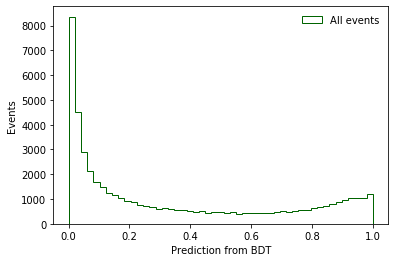

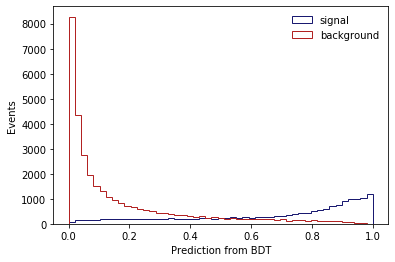

In [92]:
# Plot all predictions (both signal and background)
plt.figure()
bins = np.linspace(0,1,50)
plt.hist(predictions, bins=bins, histtype='step', color='darkgreen', label='All events')
plt.xlabel('Prediction from BDT')
plt.ylabel('Events')
plt.legend(frameon=False)

# Plot signal and background separately
plt.figure();
plt.hist(predictions[test.get_label().astype(bool)], bins=bins,histtype='step', color='midnightblue', label='signal')
plt.hist(predictions[~(test.get_label().astype(bool))], bins=bins,histtype='step', color='firebrick', label='background')
plt.xlabel('Prediction from BDT')
plt.ylabel('Events')
plt.legend(frameon=False)

We can easily plot the Receiver Operating Characteristic curve:

In [95]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test.get_label(), predictions)
roc_auc     = auc(fpr, tpr)

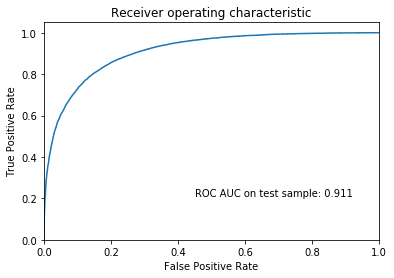

In [74]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.annotate('ROC AUC on test sample: '+str(round(roc_auc, 3)), xy=(0.45, 0.2), xycoords='axes fraction')
plt.show()

It's also very informative to look at the importance of each feature. The "F score" is the number of times each feature is used to split the data over all of the trees (times the weight of that tree).

There is a built-in function in the XGBoost python API to easily plot this:

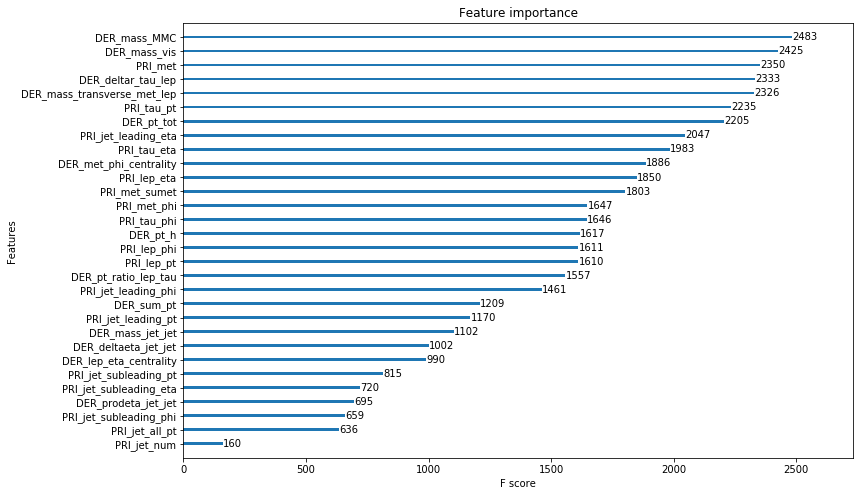

In [101]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(booster, grid=False, ax=ax)

The feature that was used the most was "```DER_mass_MMC```. (For this data the "DER" prefix is for derived variables, and "PRI" is for raw variables.)

We can plot how this feature is ditributed for the signal and background:

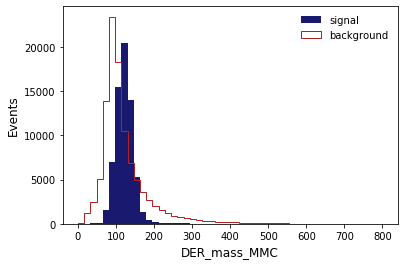

In [102]:
plt.figure()
plt.hist(data_train.DER_mass_MMC[data_train.Label == 's'],bins=np.linspace(0,800,50),color='midnightblue',label='signal')
plt.hist(data_train.DER_mass_MMC[data_train.Label == 'b'],bins=np.linspace(0,800,50),histtype='step',color='firebrick',label='background')

plt.xlabel('DER_mass_MMC',fontsize=12)
plt.ylabel('Events',fontsize=12)
plt.legend(frameon=False)

There is not a lot of discriminating power in that variable. For fun, we can plot it with the next most important feature:

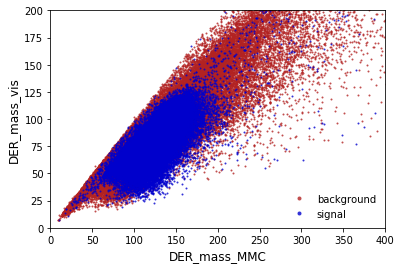

In [104]:
plt.figure()
plt.plot(data_train.DER_mass_MMC[data_train.Label == 'b'],data_train.DER_mass_vis[data_train.Label == 'b'],'o',markersize=2,color='firebrick',markeredgewidth=0,alpha=0.8,label='background')
plt.plot(data_train.DER_mass_MMC[data_train.Label == 's'],data_train.DER_mass_vis[data_train.Label == 's'],'o',markersize=2,color='mediumblue',markeredgewidth=0,alpha=0.8,label='signal')

plt.xlim(0,400)
plt.ylim(0,200)
plt.xlabel('DER_mass_MMC',fontsize=12)
plt.ylabel('DER_mass_vis',fontsize=12)
plt.legend(frameon=False,numpoints=1,markerscale=2)


# It's your turn!

Try to improve this simple model. To do this, you are free to choose one or a combination of the following options:

1. take our implementation and tune it;
2. hyperparameter tuning with GridSearch (you can get inspired by [this guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/). Guide's code is getting obsolete, ``library.py`` contains useful code to start with);
3. feature engineering (e.g. https://github.com/phunterlau/kaggle_higgs);
4. implement a different classifier (e.g. [random forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees), [MLP](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron), etc. or even a Keras deep NN!).